# Truth Social Posts - Temporal Analysis

This notebook analyzes the posting habits and temporal patterns of Truth Social posts, examining:
- **Hourly patterns**: When posts are made throughout the day
- **Daily patterns**: Which days of the week are most active
- **Monthly patterns**: How posting activity varies by month
- **Timeline analysis**: Overall trends over time

---


## Setup and Data Loading

First, let's import the necessary libraries and load our data.


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries loaded successfully!")


📚 Libraries loaded successfully!


In [121]:
# Load the Truth Social posts data
print("📊 Loading Truth Social posts data...")

df = pd.read_csv('../data/truth_social_posts_final_2025_cleaned.csv')

# Convert date_parsed to datetime
df['date_parsed'] = pd.to_datetime(df['date_parsed'])

print(f"✅ Loaded {len(df):,} posts")
print(f"📅 Date range: {df['date_parsed'].min()} to {df['date_parsed'].max()}")

# Display basic info
df.head()


📊 Loading Truth Social posts data...
✅ Loaded 3,492 posts
📅 Date range: 2025-01-01 10:48:00 to 2025-07-18 23:17:00


,speaker,handle,platform,post_url,image_url,deleted_flag,content_text,content_links,date_parsed,is_retweet,is_media_only
0,Donald Trump,@realDonaldTrump,Truth Social,https://truthsocial.com/@realDonaldTrump/posts...,https://media-cdn.factba.se/realdonaldtrump-tr...,False,NaN,NaN,2025-07-18 23:17:00,False,True
1,Donald Trump,@realDonaldTrump,Truth Social,https://truthsocial.com/@realDonaldTrump/posts...,https://media-cdn.factba.se/realdonaldtrump-tr...,False,NaN,NaN,2025-07-18 22:03:00,False,True
2,Donald Trump,@realDonaldTrump,Truth Social,https://truthsocial.com/@realDonaldTrump/posts...,https://media-cdn.factba.se/realdonaldtrump-tr...,False,We have fulfilled so many of our promises…✅One...,NaN,2025-07-18 21:39:00,False,False
3,Donald Trump,@realDonaldTrump,Truth Social,https://truthsocial.com/@realDonaldTrump/posts...,https://media-cdn.factba.se/realdonaldtrump-tr...,False,RT@realDonaldTrumpEverybody should watch Sean ...,[{'url': 'https://truthsocial.com/@realDonaldT...,2025-07-18 20:51:00,False,False
4,Donald Trump,@realDonaldTrump,Truth Social,https://truthsocial.com/@realDonaldTrump/posts...,https://media-cdn.factba.se/realdonaldtrump-tr...,False,NaN,NaN,2025-07-18 20:46:00,False,True


In [122]:
# Extract temporal components
df['hour'] = df['date_parsed'].dt.hour
df['day_of_week'] = df['date_parsed'].dt.day_name()
df['day_of_week_num'] = df['date_parsed'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['date_parsed'].dt.month
df['month_name'] = df['date_parsed'].dt.month_name()
df['date'] = df['date_parsed'].dt.date
df['week'] = df['date_parsed'].dt.isocalendar().week
df['year_month'] = df['date_parsed'].dt.to_period('M')
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

# Show the new columns
print("🕐 Temporal components extracted:")
print(f"   Hours range: {df['hour'].min()}-{df['hour'].max()}")
print(f"   Days of week: {df['day_of_week'].unique()}")
print(f"   Months: {sorted(df['month_name'].unique())}")
print(f"   Weekend posts: {df['is_weekend'].sum():,} ({df['is_weekend'].mean()*100:.1f}%)")

# Display sample with temporal data
df[['date_parsed', 'hour', 'day_of_week', 'month_name', 'is_weekend']].head()


🕐 Temporal components extracted:
   Hours range: 0-23
   Days of week: ['Friday' 'Thursday' 'Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday']
   Months: ['April', 'February', 'January', 'July', 'June', 'March', 'May']
   Weekend posts: 792 (22.7%)


,date_parsed,hour,day_of_week,month_name,is_weekend
0,2025-07-18 23:17:00,23,Friday,July,False
1,2025-07-18 22:03:00,22,Friday,July,False
2,2025-07-18 21:39:00,21,Friday,July,False
3,2025-07-18 20:51:00,20,Friday,July,False
4,2025-07-18 20:46:00,20,Friday,July,False


## 1. Hourly Analysis

Let's analyze when posts are made throughout the day to understand daily posting patterns.


🕐 Analyzing hourly posting patterns...


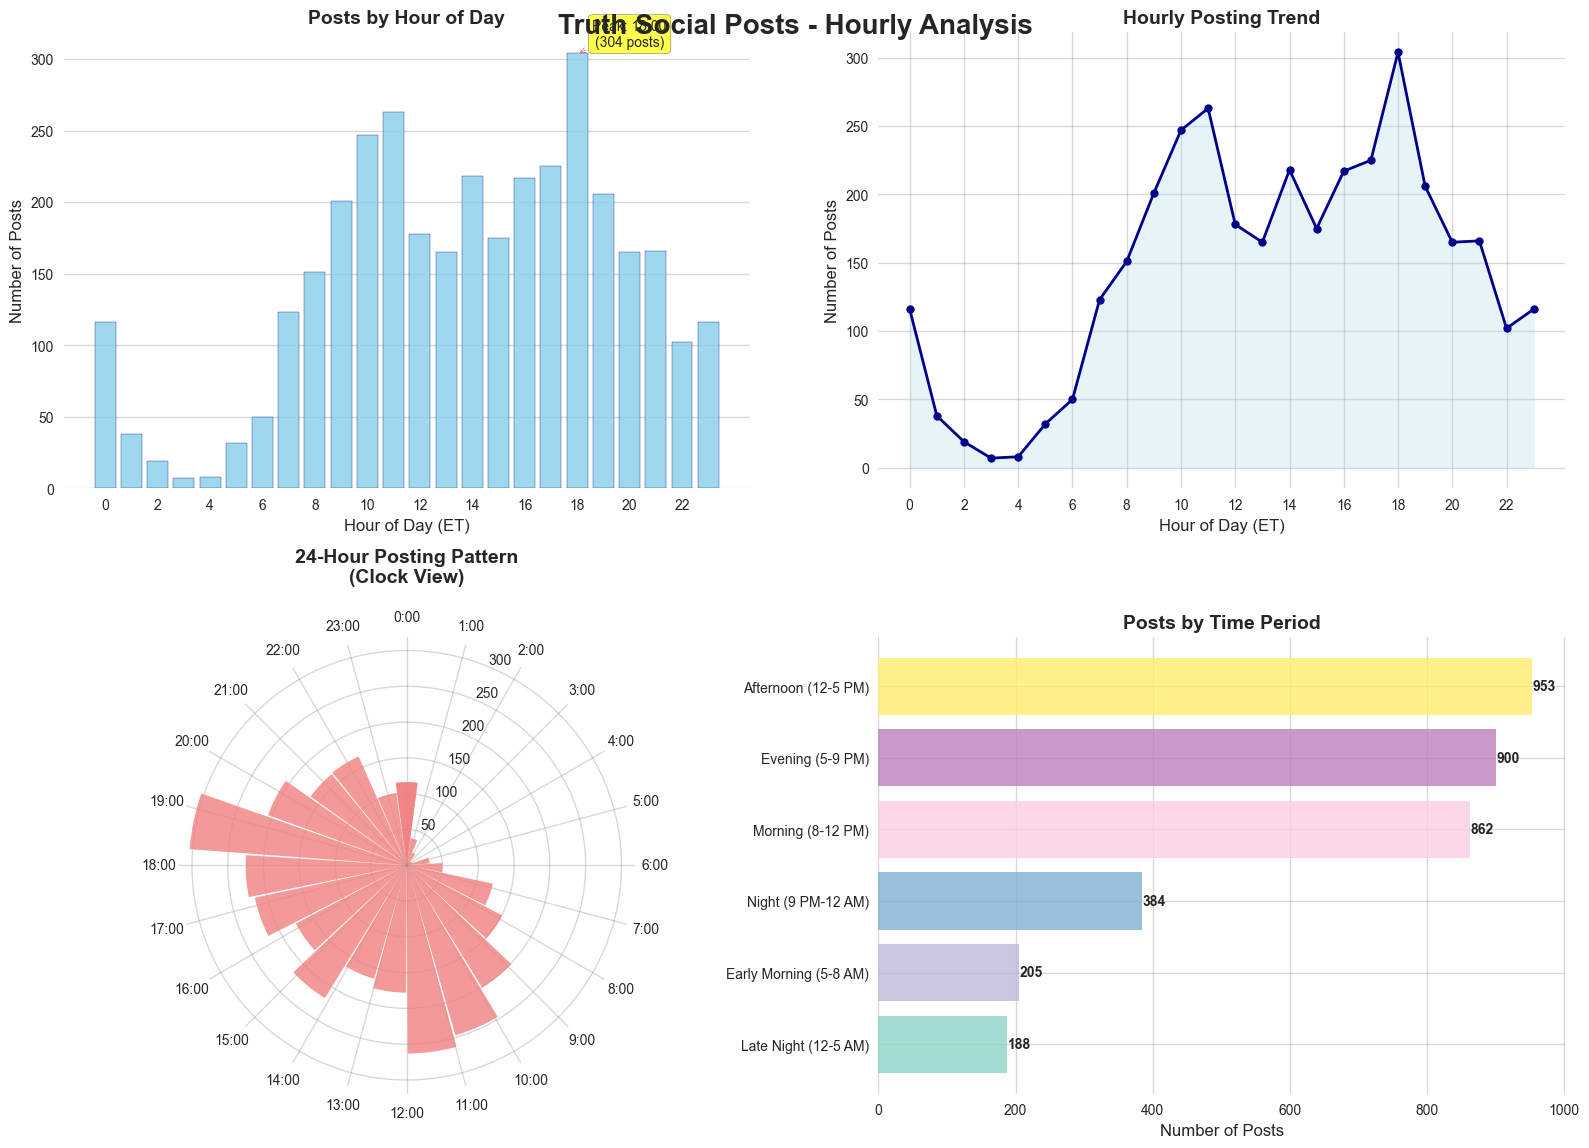


📊 HOURLY INSIGHTS:
   Peak posting hour: 18:00 (304 posts)
   Quietest hour: 3:00 (7 posts)
   Most active period: Afternoon (12-5 PM) (953 posts)


In [123]:
# Analyze hourly posting patterns
print("🕐 Analyzing hourly posting patterns...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Truth Social Posts - Hourly Analysis', fontsize=20, fontweight='bold', y=0.95)

# 1. Posts by hour - bar chart
hourly_counts = df['hour'].value_counts().sort_index()
axes[0,0].bar(hourly_counts.index, hourly_counts.values, alpha=0.8, color='skyblue', edgecolor='navy')
axes[0,0].set_facecolor('none')
axes[0,0].set_xlabel('Hour of Day (ET)', fontsize=12)
axes[0,0].set_ylabel('Number of Posts', fontsize=12)
axes[0,0].set_title('Posts by Hour of Day', fontsize=14, fontweight='bold')
axes[0,0].set_xticks(range(0, 24, 2))
axes[0,0].grid(axis='y',  color='gray', alpha=0.3)

# Add peak hour annotation
peak_hour = hourly_counts.idxmax()
peak_count = hourly_counts.max()
axes[0,0].annotate(f'Peak: {peak_hour}:00\n({peak_count} posts)', 
                  xy=(peak_hour, peak_count), xytext=(peak_hour+2, peak_count+5),
                  arrowprops=dict(arrowstyle='->', color='red'),
                  fontsize=10, ha='center', bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

# 2. Posts by hour - line plot with trend
axes[0,1].plot(hourly_counts.index, hourly_counts.values, marker='o', linewidth=2, markersize=6, color='darkblue')
axes[0,1].set_facecolor('none')
axes[0,1].fill_between(hourly_counts.index, hourly_counts.values, alpha=0.3, color='lightblue')
axes[0,1].set_xlabel('Hour of Day (ET)', fontsize=12)
axes[0,1].set_ylabel('Number of Posts', fontsize=12)
axes[0,1].set_title('Hourly Posting Trend', fontsize=14, fontweight='bold')
axes[0,1].set_xticks(range(0, 24, 2))
axes[0,1].grid(True, color='gray', alpha=0.3)

# 3. Hourly distribution - polar plot (24-hour clock view)
# --- START: REVISED CODE BLOCK ---

# First, remove the default rectangular axes created by plt.subplots()
# Note: The 3rd position in a 2x2 grid is at index [1, 0]
axes[1, 0].remove()

# Now, add a new axes object with a polar projection in that same spot
ax_polar = fig.add_subplot(2, 2, 3, projection='polar')

ax_polar.set_facecolor('none')
ax_polar.grid(True, color='gray', alpha=0.3)

# Now, create your polar plot as before
theta = np.linspace(0, 2 * np.pi, 24)
hours_array = np.array([hourly_counts.get(i, 0) for i in range(24)])

ax_polar.bar(theta, hours_array, width=2 * np.pi / 24, alpha=0.8, color='lightcoral')
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(-1)
ax_polar.set_thetagrids(range(0, 360, 15),
                       [f'{h}:00' for h in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])
ax_polar.set_title('24-Hour Posting Pattern\n(Clock View)', fontsize=14, fontweight='bold', pad=20)

# 4. Activity periods analysis
periods = {
    'Early Morning (5-8 AM)': (5, 8),
    'Morning (8-12 PM)': (8, 12),
    'Afternoon (12-5 PM)': (12, 17),
    'Evening (5-9 PM)': (17, 21),
    'Night (9 PM-12 AM)': (21, 24),
    'Late Night (12-5 AM)': (0, 5)
}

period_counts = {}
for period, (start, end) in periods.items():
    if start < end:
        count = df[(df['hour'] >= start) & (df['hour'] < end)].shape[0]
    else:  # Handle midnight crossover
        count = df[(df['hour'] >= start) | (df['hour'] < end)].shape[0]
    period_counts[period] = count

period_df = pd.DataFrame(list(period_counts.items()), columns=['Period', 'Count'])
period_df = period_df.sort_values('Count', ascending=True)

colors = plt.cm.Set3(np.linspace(0, 1, len(period_df)))
bars = axes[1,1].barh(period_df['Period'], period_df['Count'], color=colors, alpha=0.8)
axes[1,1].set_facecolor('none')
axes[1,1].set_xlabel('Number of Posts', fontsize=12)
axes[1,1].set_title('Posts by Time Period', fontsize=14, fontweight='bold')
axes[1,1].grid(True, color='gray', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[1,1].text(width + 1, bar.get_y() + bar.get_height()/2, 
                  f'{int(width)}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../images/hourly_posting_analysis.svg', format='svg', bbox_inches='tight', dpi=300)
plt.show()

# Print hourly insights
print(f"\n📊 HOURLY INSIGHTS:")
print(f"   Peak posting hour: {peak_hour}:00 ({peak_count} posts)")
print(f"   Quietest hour: {hourly_counts.idxmin()}:00 ({hourly_counts.min()} posts)")
print(f"   Most active period: {max(period_counts, key=period_counts.get)} ({max(period_counts.values())} posts)")


## 2. Daily Analysis

Now let's examine posting patterns across days of the week.


📅 Analyzing daily posting patterns...


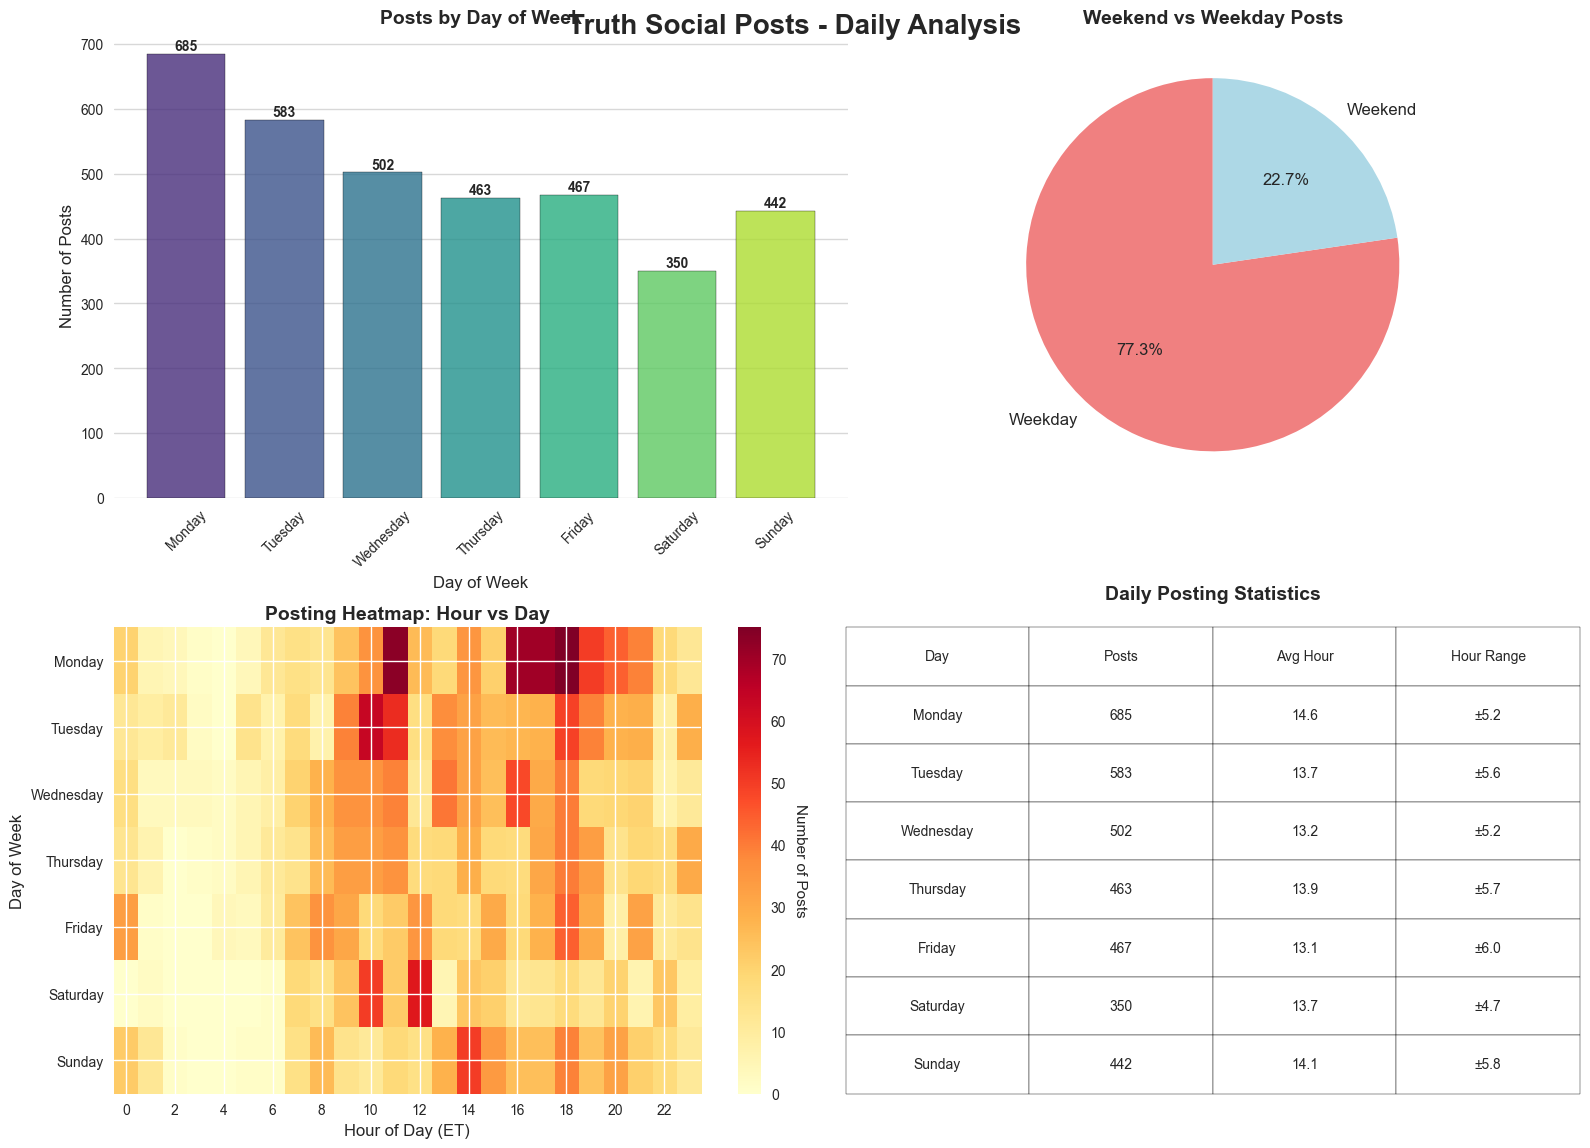


📊 DAILY INSIGHTS:
   Most active day: Monday (685 posts)
   Least active day: Saturday (350 posts)
   Weekend vs Weekday: 792 vs 2,700 posts
   Weekend percentage: 22.7%


In [124]:
# Analyze daily posting patterns
print("📅 Analyzing daily posting patterns...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Truth Social Posts - Daily Analysis', fontsize=20, fontweight='bold', y=0.95)

# Order days properly (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = df['day_of_week'].value_counts().reindex(day_order)

# 1. Posts by day of week - bar chart
colors = sns.color_palette("viridis", 7)
bars = axes[0,0].bar(daily_counts.index, daily_counts.values, color=colors, alpha=0.8, edgecolor='black')
axes[0,0].set_facecolor('none')
axes[0,0].set_xlabel('Day of Week', fontsize=12)
axes[0,0].set_ylabel('Number of Posts', fontsize=12)
axes[0,0].set_title('Posts by Day of Week', fontsize=14, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y', color='gray', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 1,
                  f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 2. Weekend vs Weekday comparison
weekend_counts = df['is_weekend'].value_counts()
weekend_labels = ['Weekday', 'Weekend']
weekend_values = [weekend_counts[False], weekend_counts[True]]

colors_pie = ['lightcoral', 'lightblue']
wedges, texts, autotexts = axes[0,1].pie(weekend_values, labels=weekend_labels, autopct='%1.1f%%',
                                       colors=colors_pie, startangle=90, textprops={'fontsize': 12})
axes[0,1].set_title('Weekend vs Weekday Posts', fontsize=14, fontweight='bold')

# 3. Posting heatmap: Hour vs Day of Week
pivot_data = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
pivot_data = pivot_data.reindex(day_order)

im = axes[1,0].imshow(pivot_data.values, cmap='YlOrRd', aspect='auto')
axes[1,0].set_xticks(range(0, 24, 2))
axes[1,0].set_xticklabels(range(0, 24, 2))
axes[1,0].set_yticks(range(len(day_order)))
axes[1,0].set_yticklabels(day_order)
axes[1,0].set_xlabel('Hour of Day (ET)', fontsize=12)
axes[1,0].set_ylabel('Day of Week', fontsize=12)
axes[1,0].set_title('Posting Heatmap: Hour vs Day', fontsize=14, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=axes[1,0])
cbar.set_label('Number of Posts', rotation=270, labelpad=15)

# 4. Daily statistics table
daily_stats = df.groupby('day_of_week').agg({
    'hour': ['mean', 'std'],
    'date_parsed': 'count'
}).round(2)
daily_stats.columns = ['Avg Hour', 'Hour Std', 'Total Posts']
daily_stats = daily_stats.reindex(day_order)

# Create a table-like visualization
axes[1,1].axis('tight')
axes[1,1].axis('off')
table_data = []
headers = ['Day', 'Posts', 'Avg Hour', 'Hour Range']

for day in day_order:
    avg_hour = daily_stats.loc[day, 'Avg Hour']
    std_hour = daily_stats.loc[day, 'Hour Std']
    total_posts = int(daily_stats.loc[day, 'Total Posts'])
    hour_range = f"±{std_hour:.1f}"
    table_data.append([day, total_posts, f"{avg_hour:.1f}", hour_range])

table = axes[1,1].table(cellText=table_data, colLabels=headers, 
                       cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
axes[1,1].set_title('Daily Posting Statistics', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../images/daily_posting_analysis.svg', format='svg', bbox_inches='tight', dpi=300)
plt.show()

# Print daily insights
print(f"\n📊 DAILY INSIGHTS:")
print(f"   Most active day: {daily_counts.idxmax()} ({daily_counts.max()} posts)")
print(f"   Least active day: {daily_counts.idxmin()} ({daily_counts.min()} posts)")
print(f"   Weekend vs Weekday: {weekend_values[1]:,} vs {weekend_values[0]:,} posts")
print(f"   Weekend percentage: {weekend_values[1]/sum(weekend_values)*100:.1f}%")


📆 Analyzing monthly posting patterns...


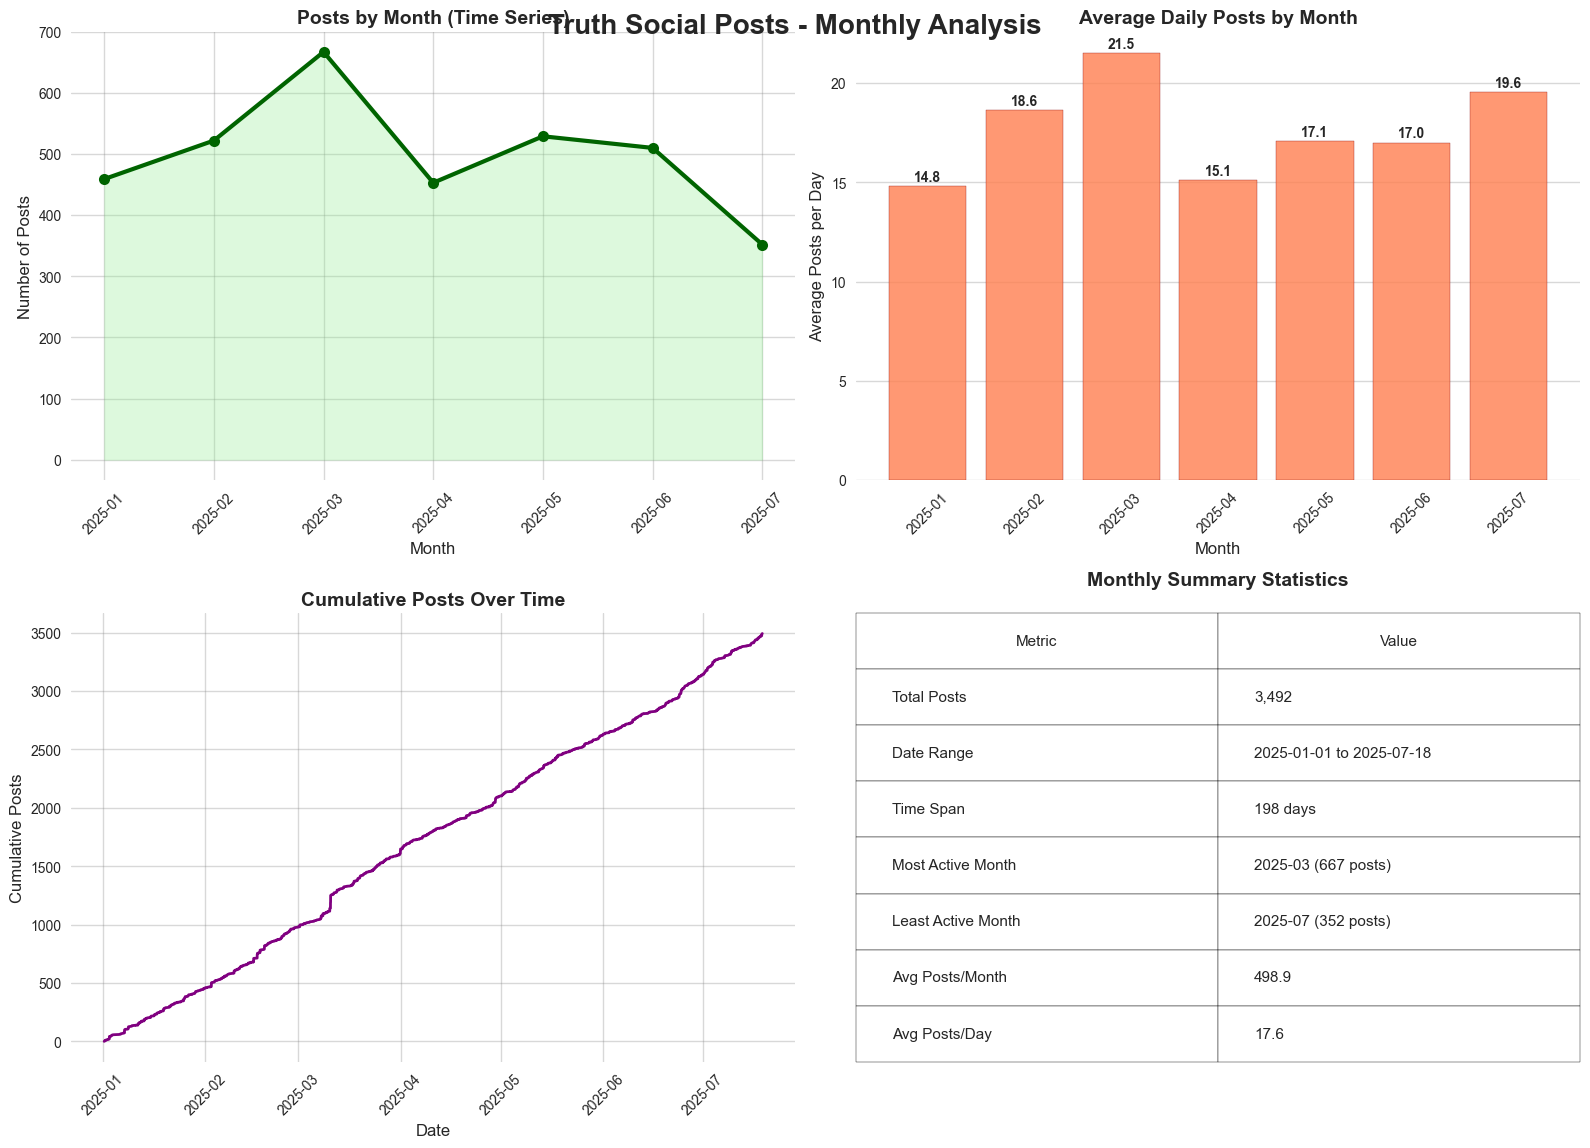


📊 MONTHLY INSIGHTS:
   Most active month: 2025-03 (667 posts)
   Least active month: 2025-07 (352 posts)
   Monthly average: 498.9 posts
   Total time span: 198 days (17.6 posts/day)


In [125]:
# Analyze monthly posting patterns
print("📆 Analyzing monthly posting patterns...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Truth Social Posts - Monthly Analysis', fontsize=20, fontweight='bold', y=0.95)

# 1. Posts by month (time series)
monthly_counts = df.groupby('year_month').size()

axes[0,0].plot(monthly_counts.index.astype(str), monthly_counts.values, 
              marker='o', linewidth=3, markersize=8, color='darkgreen')
axes[0,0].set_facecolor('none')
axes[0,0].fill_between(range(len(monthly_counts)), monthly_counts.values, alpha=0.3, color='lightgreen')
axes[0,0].set_xlabel('Month', fontsize=12)
axes[0,0].set_ylabel('Number of Posts', fontsize=12)
axes[0,0].set_title('Posts by Month (Time Series)', fontsize=14, fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, color='gray', alpha=0.3)

# 2. Average posts per day by month
monthly_avg = df.groupby('year_month').apply(lambda x: (x.groupby('date').size()).mean())

bars = axes[0,1].bar(range(len(monthly_avg)), monthly_avg.values, 
                    color='coral', alpha=0.8, edgecolor='darkred')
axes[0,1].set_facecolor('none')
axes[0,1].set_xlabel('Month', fontsize=12)
axes[0,1].set_ylabel('Average Posts per Day', fontsize=12)
axes[0,1].set_title('Average Daily Posts by Month', fontsize=14, fontweight='bold')
axes[0,1].set_xticks(range(len(monthly_avg)))
axes[0,1].set_xticklabels([str(m) for m in monthly_avg.index], rotation=45)
axes[0,1].grid(axis='y', color='gray', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                  f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Cumulative posts over time
df_sorted = df.sort_values('date_parsed')
df_sorted['cumulative_posts'] = range(1, len(df_sorted) + 1)

axes[1,0].plot(df_sorted['date_parsed'], df_sorted['cumulative_posts'], 
              color='purple', linewidth=2)
axes[1,0].set_facecolor('none')
axes[1,0].set_xlabel('Date', fontsize=12)
axes[1,0].set_ylabel('Cumulative Posts', fontsize=12)
axes[1,0].set_title('Cumulative Posts Over Time', fontsize=14, fontweight='bold')
axes[1,0].grid(True, color='gray', alpha=0.3)
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Monthly summary statistics
axes[1,1].axis('tight')
axes[1,1].axis('off')

total_days = (df['date_parsed'].max() - df['date_parsed'].min()).days
summary_stats = [
    ['Total Posts', f"{len(df):,}"],
    ['Date Range', f"{df['date_parsed'].min().strftime('%Y-%m-%d')} to {df['date_parsed'].max().strftime('%Y-%m-%d')}"],
    ['Time Span', f"{total_days} days"],
    ['Most Active Month', f"{monthly_counts.idxmax()} ({monthly_counts.max()} posts)"],
    ['Least Active Month', f"{monthly_counts.idxmin()} ({monthly_counts.min()} posts)"],
    ['Avg Posts/Month', f"{monthly_counts.mean():.1f}"],
    ['Avg Posts/Day', f"{len(df) / total_days:.1f}"]
]

table = axes[1,1].table(cellText=summary_stats, colLabels=['Metric', 'Value'],
                       cellLoc='left', loc='center', bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)
axes[1,1].set_title('Monthly Summary Statistics', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../images/monthly_posting_analysis.svg', format='svg', bbox_inches='tight', dpi=300)
plt.show()

# Print monthly insights
print(f"\n📊 MONTHLY INSIGHTS:")
print(f"   Most active month: {monthly_counts.idxmax()} ({monthly_counts.max()} posts)")
print(f"   Least active month: {monthly_counts.idxmin()} ({monthly_counts.min()} posts)")
print(f"   Monthly average: {monthly_counts.mean():.1f} posts")
print(f"   Total time span: {total_days} days ({len(df) / total_days:.1f} posts/day)")


📈 Creating timeline visualization...


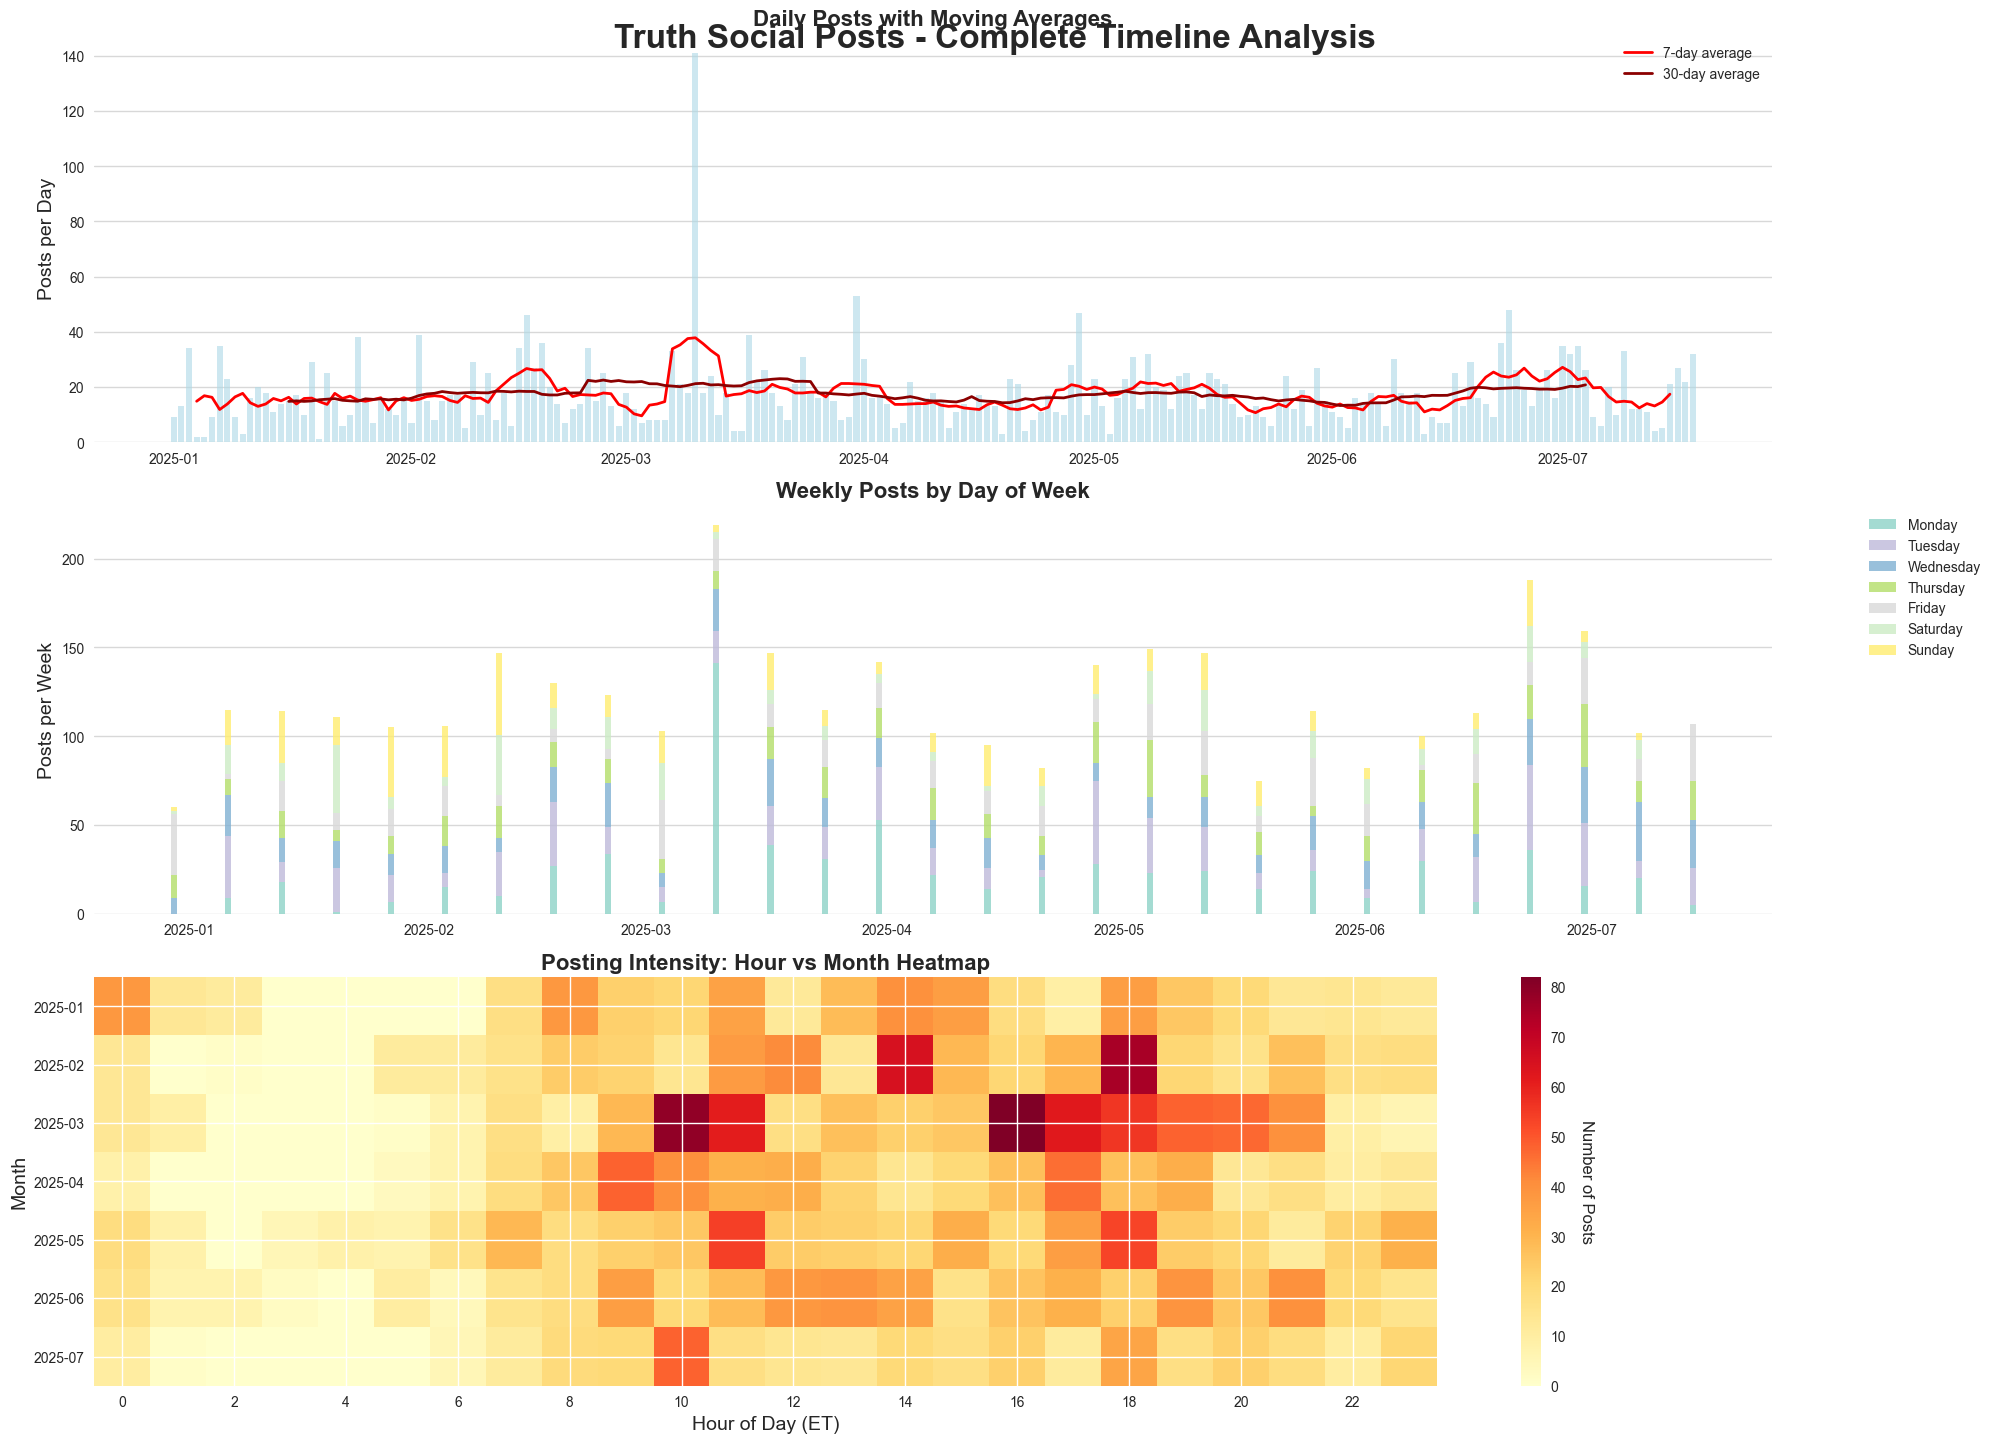

In [126]:
# Create comprehensive timeline visualization
print("📈 Creating timeline visualization...")

fig, axes = plt.subplots(3, 1, figsize=(20, 15))
fig.suptitle('Truth Social Posts - Complete Timeline Analysis', fontsize=24, fontweight='bold', y=0.95)

# 1. Daily posts timeline with moving averages
daily_posts = df.groupby('date').size()
daily_posts_complete = daily_posts.reindex(
    pd.date_range(start=daily_posts.index.min(), end=daily_posts.index.max(), freq='D'),
    fill_value=0
)

# Calculate moving averages
moving_avg_7 = daily_posts_complete.rolling(window=7, center=True).mean()
moving_avg_30 = daily_posts_complete.rolling(window=30, center=True).mean()

axes[0].bar(daily_posts_complete.index, daily_posts_complete.values, 
           alpha=0.6, color='lightblue', edgecolor='none', width=0.8)
axes[0].set_facecolor('none')
axes[0].plot(daily_posts_complete.index, moving_avg_7, color='red', linewidth=2, label='7-day average')
axes[0].plot(daily_posts_complete.index, moving_avg_30, color='darkred', linewidth=2, label='30-day average')
axes[0].set_ylabel('Posts per Day', fontsize=14)
axes[0].set_title('Daily Posts with Moving Averages', fontsize=16, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', color='gray', alpha=0.3)

# 2. Weekly posts broken down by day of week (stacked)
df['week_start'] = df['date_parsed'].dt.to_period('W').dt.start_time
weekly_by_day = df.groupby(['week_start', 'day_of_week']).size().unstack(fill_value=0)

# Reorder columns for proper day sequence
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_by_day = weekly_by_day.reindex(columns=day_order, fill_value=0)

# Stacked bar chart
bottom = np.zeros(len(weekly_by_day))
colors = plt.cm.Set3(np.linspace(0, 1, 7))

for i, day in enumerate(day_order):
    if day in weekly_by_day.columns:
        axes[1].bar(weekly_by_day.index, weekly_by_day[day], bottom=bottom,
                   label=day, color=colors[i], alpha=0.8)
        bottom += weekly_by_day[day]

axes[1].set_ylabel('Posts per Week', fontsize=14)
axes[1].set_facecolor('none')
axes[1].set_title('Weekly Posts by Day of Week', fontsize=16, fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', color='gray', alpha=0.3)

# 3. Monthly-hourly heatmap
df['year_month_str'] = df['date_parsed'].dt.strftime('%Y-%m')
hourly_monthly = df.groupby(['year_month_str', 'hour']).size().unstack(fill_value=0)

im = axes[2].imshow(hourly_monthly.values, cmap='YlOrRd', aspect='auto')
axes[2].set_xticks(range(0, 24, 2))
axes[2].set_xticklabels(range(0, 24, 2))
axes[2].set_yticks(range(len(hourly_monthly)))
axes[2].set_yticklabels(hourly_monthly.index, fontsize=10)
axes[2].set_xlabel('Hour of Day (ET)', fontsize=14)
axes[2].set_ylabel('Month', fontsize=14)
axes[2].set_title('Posting Intensity: Hour vs Month Heatmap', fontsize=16, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=axes[2])
cbar.set_label('Number of Posts', rotation=270, labelpad=20, fontsize=12)

plt.tight_layout()
plt.savefig('../images/complete_timeline_analysis.svg', format='svg', bbox_inches='tight', dpi=300)
plt.show()


In [127]:
# Generate comprehensive summary
print("\n" + "="*80)
print("📋 COMPREHENSIVE TEMPORAL ANALYSIS SUMMARY")
print("="*80)

# Overall statistics
total_posts = len(df)
total_days = (df['date_parsed'].max() - df['date_parsed'].min()).days
avg_per_day = total_posts / total_days

print(f"\n🔢 OVERALL STATISTICS:")
print(f"   Total posts: {total_posts:,}")
print(f"   Date range: {df['date_parsed'].min().strftime('%B %d, %Y')} to {df['date_parsed'].max().strftime('%B %d, %Y')}")
print(f"   Time span: {total_days} days")
print(f"   Average posts per day: {avg_per_day:.1f}")

# Hourly insights
hourly_counts = df['hour'].value_counts().sort_index()
peak_hour = hourly_counts.idxmax()
quietest_hour = hourly_counts.idxmin()

print(f"\n🕐 HOURLY PATTERNS:")
print(f"   Most active hour: {peak_hour}:00 ({hourly_counts[peak_hour]} posts)")
print(f"   Least active hour: {quietest_hour}:00 ({hourly_counts[quietest_hour]} posts)")
print(f"   Most active period: {max(period_counts, key=period_counts.get)} ({period_counts[max(period_counts, key=period_counts.get)]} posts)")

# Daily insights
daily_counts = df['day_of_week'].value_counts().reindex(day_order)
most_active_day = daily_counts.idxmax()
least_active_day = daily_counts.idxmin()
weekend_posts = df[df['is_weekend']].shape[0]
weekday_posts = df[~df['is_weekend']].shape[0]

print(f"\n📅 DAILY PATTERNS:")
print(f"   Most active day: {most_active_day} ({daily_counts[most_active_day]} posts)")
print(f"   Least active day: {least_active_day} ({daily_counts[least_active_day]} posts)")
print(f"   Weekend vs Weekday: {weekend_posts:,} vs {weekday_posts:,} posts")
print(f"   Weekend percentage: {weekend_posts/total_posts*100:.1f}%")

# Monthly insights
monthly_counts = df.groupby('year_month').size()
most_active_month = monthly_counts.idxmax()
least_active_month = monthly_counts.idxmin()

print(f"\n📆 MONTHLY PATTERNS:")
print(f"   Most active month: {most_active_month} ({monthly_counts[most_active_month]} posts)")
print(f"   Least active month: {least_active_month} ({monthly_counts[least_active_month]} posts)")
print(f"   Monthly average: {monthly_counts.mean():.1f} posts")

# Posting behavior insights
print(f"\n🎯 KEY BEHAVIORAL INSIGHTS:")

# Peak posting times
print(f"   📈 Peak Activity: {peak_hour}:00 hour on {most_active_day}s")

# Activity concentration
top_3_hours = hourly_counts.nlargest(3)
top_3_percentage = (top_3_hours.sum() / total_posts) * 100
print(f"   🔥 Top 3 hours ({top_3_hours.index.tolist()}) account for {top_3_percentage:.1f}% of all posts")

# Weekday vs weekend behavior
weekend_avg_hour = df[df['is_weekend']]['hour'].mean()
weekday_avg_hour = df[~df['is_weekend']]['hour'].mean()
print(f"   ⏰ Average posting time: Weekdays {weekday_avg_hour:.1f}:00, Weekends {weekend_avg_hour:.1f}:00")

# Activity consistency
daily_post_counts = df.groupby('date').size()
consistency = 1 - (daily_post_counts.std() / daily_post_counts.mean())
print(f"   📊 Posting consistency: {consistency:.2f} (0=chaotic, 1=very consistent)")

print("\n" + "="*80)
print("🎉 Analysis completed! All visualizations saved to ../images/")
print("="*80)



📋 COMPREHENSIVE TEMPORAL ANALYSIS SUMMARY

🔢 OVERALL STATISTICS:
   Total posts: 3,492
   Date range: January 01, 2025 to July 18, 2025
   Time span: 198 days
   Average posts per day: 17.6

🕐 HOURLY PATTERNS:
   Most active hour: 18:00 (304 posts)
   Least active hour: 3:00 (7 posts)
   Most active period: Afternoon (12-5 PM) (953 posts)

📅 DAILY PATTERNS:
   Most active day: Monday (685 posts)
   Least active day: Saturday (350 posts)
   Weekend vs Weekday: 792 vs 2,700 posts
   Weekend percentage: 22.7%

📆 MONTHLY PATTERNS:
   Most active month: 2025-03 (667 posts)
   Least active month: 2025-07 (352 posts)
   Monthly average: 498.9 posts

🎯 KEY BEHAVIORAL INSIGHTS:
   📈 Peak Activity: 18:00 hour on Mondays
   🔥 Top 3 hours ([18, 11, 10]) account for 23.3% of all posts
   ⏰ Average posting time: Weekdays 13.8:00, Weekends 13.9:00
   📊 Posting consistency: 0.25 (0=chaotic, 1=very consistent)

🎉 Analysis completed! All visualizations saved to ../images/
